# We used 6 classifiers and compared their performence.  As we split our Train and Test data randomly, so we can expect different performence of models for every new run. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.preprocessing
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score
def k_Fold_CV(x, y):
    param_grid_knn = {'n_neighbors': np.arange(7, 21, 7)}
    param_grid_svm = {'C': np.logspace(0, 3, 4), 'gamma': np.logspace(-2, 1, 4), 'kernel':['linear', 'poly', 'rbf']}
    param_grid_dt = {'max_depth': np.arange(2, 10, 2)}
    param_grid_rdf = {'n_estimators': np.arange(50, 100, 10), 'max_depth': np.arange(2, 10, 2)}
    param_grid_ln = {'solver': ['lbfgs', 'sag', 'newton-cg']}
    param_grid_nb = {'var_smoothing': np.array([1e-09])}

    models = [('KNN', KNeighborsClassifier(), param_grid_knn), ('SVM', SVC(), param_grid_svm),
              ('DT', DecisionTreeClassifier(), param_grid_dt), ('RDF', RandomForestClassifier(), param_grid_rdf),
              ('LN', LogisticRegression(), param_grid_ln), ('NB', GaussianNB(), param_grid_nb)]
    best_cv_score = []
    mean_cv_score = []

    for name, model, param_grid in models:
        grid_cv = GridSearchCV(model, param_grid, cv=5).fit(x, y)
        print("Best parameters for : ", name, " is ", grid_cv.best_params_)
        print("%.1f%% accuracy on validation sets (average)" % (grid_cv.best_score_*100))
        best_cv_score.append(grid_cv.best_score_)
        ac_score = cross_val_score(model, x, y, cv=5, scoring='accuracy')
        mean_cv_score.append(ac_score.mean())
    return best_cv_score, mean_cv_score

In [3]:
def model_svm(X_train, X_test, y_train, y_test):
    model = SVC(C = 100.0, kernel='rbf', gamma=0.01).fit(X_train,y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    return model, accuracy_train, accuracy_test

In [4]:
def model_logistic(X_train, X_test, y_train, y_test):
    model = LogisticRegression(multi_class='multinomial',solver ='lbfgs').fit(X_train,y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    return model, accuracy_train, accuracy_test

In [5]:
def model_randomForest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=90,max_depth = 8).fit(X_train,y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    return model, accuracy_train, accuracy_test

In [6]:
def model_DecisionTree(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(max_depth = 8).fit(X_train,y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    return model, accuracy_train, accuracy_test

In [7]:
def model_NaiveBayes(X_train, X_test, y_train, y_test):
    model = GaussianNB().fit(X_train,y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    return model, accuracy_train, accuracy_test

In [8]:
def model_KNeighbors(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors = 14).fit(X_train, y_train) 
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    return model, accuracy_train, accuracy_test

In [9]:
def ConfusionMatrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,['COW','CAR', 'HOUSE', 'TREE'], ['COW','CAR', 'HOUSE', 'TREE'])                      
    f, ax = plt.subplots(figsize=(6, 4))
    sn.heatmap(cm_df, annot=True, fmt="d")
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

In [10]:
# calculate accurecy
def calculate_accurecy(y_true, y_pred):   
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    F1 = 2*(precision*recall)/(precision+recall)
    model_perm = np.array(["%.3f" %accuracy, "%.3f" %recall, "%.3f" %precision, "%.3f" %F1])
    model_perm1 =np.asarray(model_perm, dtype='float64')*100
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('F1:%.3f'%F1)
#     print(model_perm)
    return accuracy, recall, precision, F1, model_perm1

## We have 4 statistical meausres: moment, mean, variance and skeness. We have total 12 features. We are not using moment as it is all zero. Also discrded all the data labeled with 0.   

In [11]:
df1 = pd.read_csv('data_csv/data_cow.csv', names=[x for x in range(13)])
df2 = pd.read_csv('data_csv/data_car.csv', names=[x for x in range(13)])
df3 = pd.read_csv('data_csv/data_house.csv', names=[x for x in range(13)])
df4 = pd.read_csv('data_csv/data_tree.csv', names=[x for x in range(13)])
frames = [df1, df2, df3, df4]
df = pd.concat(frames)
df = df.loc[df[12] != 0] 
df = df.sample(frac=1).reset_index(drop=True)
X = df[[x for x in range(9)]]
Y = df[12]
vc = df[12].value_counts()
# vc.plot.bar()
vc = np.asarray(vc)
# vc
# X

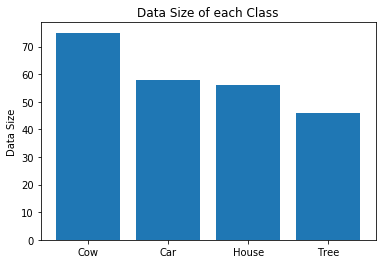

In [12]:
data = [vc[0], vc[1], vc[2], vc[3]]
labels = ["Cow", "Car", "House", "Tree"]
title = "Data Size of each Class"

x = np.arange(4)
fig, ax = plt.subplots()
ax.set_ylabel('Data Size')
ax.set_title(title)
plt.bar(x, data)
plt.xticks(x, labels)
plt.show()

In [92]:
## Data split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
## Data scaling
scaler = sklearn.preprocessing.StandardScaler()
# scaler = sklearn.preprocessing.RobustScaler()
# scaler = sklearn.preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# y_test.value_counts()

In [59]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter(action='ignore', category=ConvergenceWarning)
simplefilter(action='ignore', category=FutureWarning)

k_Fold_CV(scaler.fit_transform(X), Y)

Best parameters for :  KNN  is  {'n_neighbors': 14}
56.6% accuracy on validation sets (average)
Best parameters for :  SVM  is  {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
69.4% accuracy on validation sets (average)
Best parameters for :  DT  is  {'max_depth': 8}
58.3% accuracy on validation sets (average)
Best parameters for :  RDF  is  {'max_depth': 8, 'n_estimators': 90}
64.7% accuracy on validation sets (average)
Best parameters for :  LN  is  {'solver': 'lbfgs'}
58.7% accuracy on validation sets (average)
Best parameters for :  NB  is  {'var_smoothing': 1e-09}
43.4% accuracy on validation sets (average)


([0.5659574468085107,
  0.6936170212765957,
  0.5829787234042553,
  0.6468085106382979,
  0.5872340425531914,
  0.4340425531914893],
 [0.5787234042553191,
  0.6595744680851063,
  0.5914893617021277,
  0.625531914893617,
  0.5872340425531914,
  0.4340425531914893])

0.8536585365853658 0.676056338028169
 
Trining Accuracy SVM
accuracy:0.854
recall:0.854
precision:0.855
F1:0.854
 
Test Accuracy SVM
accuracy:0.676
recall:0.676
precision:0.691
F1:0.683
[85.4 85.4 85.5 85.4]
[67.6 67.6 69.1 68.3]


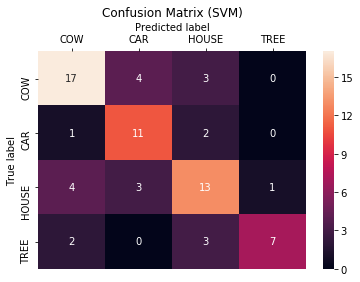

In [105]:
modelsvm, accuracy_train, accuracy_test = model_svm(X_train, X_test, y_train, y_test)
print(accuracy_train, accuracy_test)
y_pred = modelsvm.predict(X_test)
title = "Confusion Matrix (SVM)"
ConfusionMatrix(y_test, y_pred, title)
# Training Error for SVM
print(' ')
print("Trining Accuracy SVM")
y_pred = modelsvm.predict(X_train)
_, _, _, _, svm0 = calculate_accurecy(y_train, y_pred)
# Test Error for LG
print(' ')
print("Test Accuracy SVM")
y_pred = modelsvm.predict(X_test)
_, _, _, _, svm1 =calculate_accurecy(y_test, y_pred)
print(svm0)
print(svm1)

0.6341463414634146 0.49295774647887325
 
Trining Accuracy LG
accuracy:0.634
recall:0.634
precision:0.622
F1:0.628
 
Test Accuracy LG
accuracy:0.493
recall:0.493
precision:0.458
F1:0.475


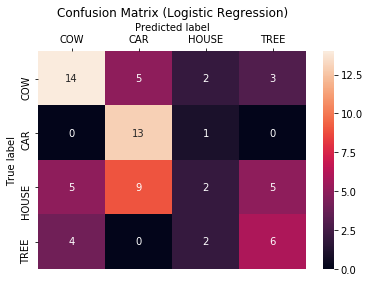

In [106]:
model_lg, accuracy_train, accuracy_test = model_logistic(X_train, X_test, y_train, y_test)
print(accuracy_train, accuracy_test)
y_pred = model_lg.predict(X_test)
title = "Confusion Matrix (Logistic Regression)"
ConfusionMatrix(y_test, y_pred, title)
# Training Error for LG
print(' ')
print("Trining Accuracy LG")
y_pred = model_lg.predict(X_train)
_, _, _, _, lg0 =calculate_accurecy(y_train, y_pred)
# Test Error for LG
print(' ')
print("Test Accuracy LG")
y_pred = model_lg.predict(X_test)
_, _, _, _, lg1 =calculate_accurecy(y_test, y_pred)


1.0 0.6056338028169014
 
Trining Accuracy RDF
accuracy:1.000
recall:1.000
precision:1.000
F1:1.000
 
Test Accuracy RDF
accuracy:0.606
recall:0.606
precision:0.607
F1:0.606


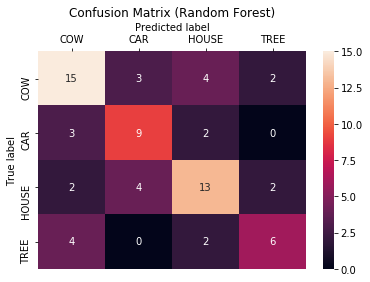

In [107]:
model_rdf, accuracy_train, accuracy_test = model_randomForest(X_train, X_test, y_train, y_test)
print(accuracy_train, accuracy_test)
y_pred = model_rdf.predict(X_test)
title = "Confusion Matrix (Random Forest)"
ConfusionMatrix(y_test, y_pred, title)
# Training Error
print(' ')
print("Trining Accuracy RDF")
y_pred = model_rdf.predict(X_train)
_, _, _, _, rdf0 =calculate_accurecy(y_train, y_pred)
# Test Error
print(' ')
print("Test Accuracy RDF")
y_pred = model_rdf.predict(X_test)
_, _, _, _, rdf1 =calculate_accurecy(y_test, y_pred)

0.9512195121951219 0.4788732394366197
 
Trining Accuracy DT
accuracy:0.951
recall:0.951
precision:0.959
F1:0.955
 
Test Accuracy DT
accuracy:0.479
recall:0.479
precision:0.539
F1:0.507


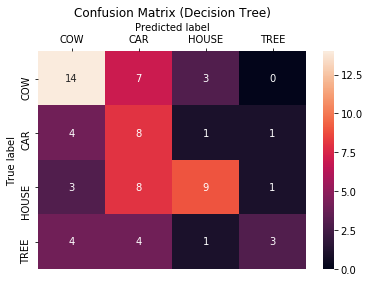

In [108]:
model_dt, accuracy_train, accuracy_test = model_DecisionTree(X_train, X_test, y_train, y_test)
print(accuracy_train, accuracy_test)
y_pred = model_dt.predict(X_test)
title = "Confusion Matrix (Decision Tree)"
ConfusionMatrix(y_test, y_pred, title)
# Training Error
print(' ')
print("Trining Accuracy DT")
y_pred = model_dt.predict(X_train)
_, _, _, _, dt0 =calculate_accurecy(y_train, y_pred)
# Test Error
print(' ')
print("Test Accuracy DT")
y_pred = model_dt.predict(X_test)
_, _, _, _, dt1 =calculate_accurecy(y_test, y_pred)

0.524390243902439 0.4084507042253521
 
Trining Accuracy NB
accuracy:0.524
recall:0.524
precision:0.551
F1:0.537
 
Test Accuracy NB
accuracy:0.408
recall:0.408
precision:0.381
F1:0.394


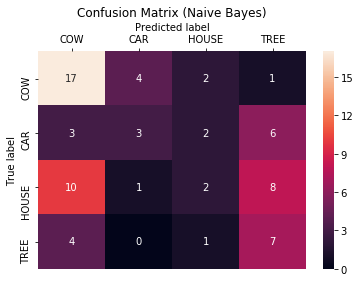

In [109]:
model_nbs, accuracy_train, accuracy_test = model_NaiveBayes(X_train, X_test, y_train, y_test)
print(accuracy_train, accuracy_test)
y_pred = model_nbs.predict(X_test)
title = "Confusion Matrix (Naive Bayes)"
ConfusionMatrix(y_test, y_pred, title)
# Training Error
print(' ')
print("Trining Accuracy NB")
y_pred = model_nbs.predict(X_train)
_, _, _, _, nb0 =calculate_accurecy(y_train, y_pred)
# Test Error
print(' ')
print("Test Accuracy NB")
y_pred = model_nbs.predict(X_test)
_, _, _, _, nb1 =calculate_accurecy(y_test, y_pred)

0.6646341463414634 0.5070422535211268
 
Trining Accuracy KNN
accuracy:0.665
recall:0.665
precision:0.670
F1:0.667
 
Test Accuracy KNN
accuracy:0.507
recall:0.507
precision:0.514
F1:0.510


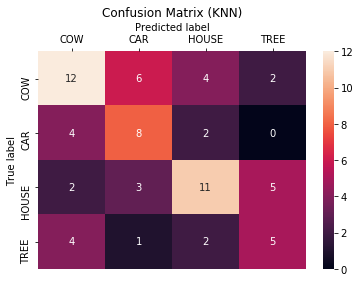

In [110]:
model_knn, accuracy_train, accuracy_test = model_KNeighbors(X_train, X_test, y_train, y_test)
print(accuracy_train, accuracy_test)
y_pred = model_knn.predict(X_test)
title = "Confusion Matrix (KNN)"
ConfusionMatrix(y_test, y_pred, title)
# Training Error
print(' ')
print("Trining Accuracy KNN")
y_pred = model_knn.predict(X_train)
_, _, _, _, knn0 =calculate_accurecy(y_train, y_pred)
# Test Error
print(' ')
print("Test Accuracy KNN")
y_pred = model_knn.predict(X_test)
_, _, _, _, knn1 =calculate_accurecy(y_test, y_pred)


In [114]:
def bar_chat(labels, svm, lg, rdf, dt, nb, knn, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x - 2.5*width, svm, width, label='SVM')
    ax.bar(x - 1.5*width, lg, width, label='LN')
    ax.bar(x - 0.5*width, rdf, width, label='RDF')
    ax.bar(x + 0.5*width, dt, width, label='DT')
    ax.bar(x + 1.5*width, nb, width, label='NB')
    ax.bar(x + 2.5*width, knn, width, label='KNN')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Rate %')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim([0,100])
    ax.legend()

    fig.tight_layout()
    plt.show()
    

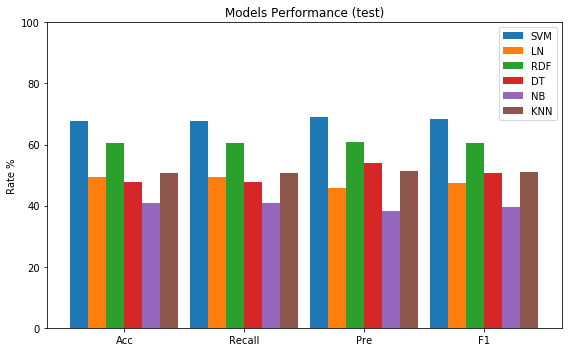

In [115]:
labels = ['Acc', 'Recall', 'Pre', 'F1']   
title = 'Models Performance (test)'
bar_chat(labels, svm1, lg1, rdf1, dt1, nb1, knn1, title)

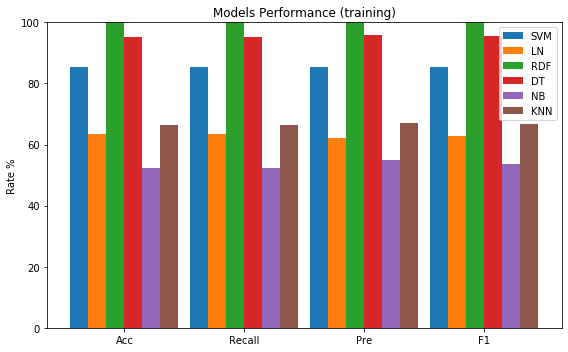

In [116]:
labels = ['Acc', 'Recall', 'Pre', 'F1']   
title = 'Models Performance (training)'
bar_chat(labels, svm0, lg0, rdf0, dt0, nb0, knn0, title)